In [4]:
# install fastkaggle if not available
try: import fastkaggle
except ModuleNotFoundError:
    %pip install -Uq fastkaggle

from fastkaggle import *

In [5]:
from fastai.imports import *
from fastai.tabular.all import *

np.set_printoptions(linewidth=110)

In [6]:
comp = 'bluebook-for-bulldozers'
path = setup_comp(comp, install='fastai')

path.ls(file_type='text')
df = pd.read_csv(path/'TrainAndValid.csv', low_memory=False)
tst_df = pd.read_csv(path/'Test.csv', low_memory=False)

In [7]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
tst_df.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,5/3/2012 0:00,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,5/10/2012 0:00,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,5/10/2012 0:00,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,5/10/2012 0:00,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,5/10/2012 0:00,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [9]:
len(df.columns), df.columns

(53,
 Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
        'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
        'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
        'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
        'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
        'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
        'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
        'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
        'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
        'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
        'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
        'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
        'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
       dtype='object'))

In [10]:
# find nans
columns_with_nan = df.columns[df.isna().any()].tolist()

# To get the count of NaN values per column
nan_count_per_column = df.isna().sum()

L(columns_with_nan)


(#40) ['auctioneerID','MachineHoursCurrentMeter','UsageBand','fiSecondaryDesc','fiModelSeries','fiModelDescriptor','ProductSize','Drive_System','Enclosure','Forks'...]

In [11]:
print("NaN count per column:")
print(nan_count_per_column)

NaN count per column:
SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                33160

In [12]:
modes = df.mode().iloc[0]
modes

SalesID                                                                     1139246
SalePrice                                                                   25000.0
MachineID                                                                 2283592.0
ModelID                                                                      4605.0
datasource                                                                    132.0
auctioneerID                                                                    1.0
YearMade                                                                     1000.0
MachineHoursCurrentMeter                                                        0.0
UsageBand                                                                    Medium
saledate                                                             2/16/2009 0:00
fiModelDesc                                                                    310G
fiBaseModel                                                                 

In [13]:
# year made of 1000 doesn't make any sense
# let's replace it by the second most common year (besides that problematic 1000)
df['YearMade'].value_counts()

YearMade
1000    39391
2005    22096
1998    21751
2004    20914
1999    19274
        ...  
1937        1
1949        1
1947        1
2012        1
2013        1
Name: count, Length: 73, dtype: int64

In [14]:
df.loc[df['YearMade'] == 1000, 'YearMade'] = df['YearMade'].value_counts().index[1]
df['YearMade'].value_counts()

YearMade
2005    61487
1998    21751
2004    20914
1999    19274
1997    19269
        ...  
1937        1
1949        1
1947        1
2012        1
2013        1
Name: count, Length: 72, dtype: int64

In [15]:
# seems like this is incompatible with fastai fillmissing? TBC!
# df.fillna(modes, inplace=True)
# tst_df.fillna(modes, inplace=True)

### What's an Ordinal Columns

In [16]:
df['ProductSize'].unique()

array([nan, 'Medium', 'Small', 'Large / Medium', 'Mini', 'Large', 'Compact'], dtype=object)

In [17]:
sizes = 'Large','Large / Medium','Medium','Small','Mini','Compact'

In [18]:
df['ProductSize'] = df['ProductSize'].astype('category')
df['ProductSize'] = df['ProductSize'].cat.set_categories(sizes, ordered=True)
df.ProductSize

0            NaN
1         Medium
2            NaN
3          Small
4            NaN
           ...  
412693      Mini
412694      Mini
412695      Mini
412696      Mini
412697      Mini
Name: ProductSize, Length: 412698, dtype: category
Categories (6, object): ['Large' < 'Large / Medium' < 'Medium' < 'Small' < 'Mini' < 'Compact']

### Dependent Variable

In [19]:
dep_var = 'SalePrice'
df[dep_var] = np.log(df[dep_var])

# Decision Trees

### How to categorify Dates

Why not just turn dates into timestamps and consider it as timestamps? Fastai recommend that we do further feature engineering in the date.

If we don't do that we will have a split point like "happened before or after 2024/12/03"?, but if we do further feature engineering and break downs the dates, we can have many more split points!

like happened:

- happened before or after march 

- happened before or after wednesday

If we didn't do the feature engineering we cannot express periodicities like that

In [20]:
# handling date
from fastai.tabular.all import add_datepart

df = add_datepart(df, 'saledate')
tst_df = add_datepart(tst_df, 'saledate')

columns_starting_with_sale = [col for col in df.columns if col.startswith('sale')]
columns_starting_with_sale

/Users/cactus/miniconda3/envs/fastai/lib/python3.11/site-packages/fastai/tabular/core.py:23: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df[date_field] = pd.to_datetime(df[date_field], infer_datetime_format=True)
/Users/cactus/miniconda3/envs/fastai/lib/python3.11/site-packages/fastai/tabular/core.py:23: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df[date_field] = pd.to_datetime(df[date_field], infer_datetime_format=True)


['saleYear',
 'saleMonth',
 'saleWeek',
 'saleDay',
 'saleDayofweek',
 'saleDayofyear',
 'saleIs_month_end',
 'saleIs_month_start',
 'saleIs_quarter_end',
 'saleIs_quarter_start',
 'saleIs_year_end',
 'saleIs_year_start',
 'saleElapsed']

In [21]:
# Filter columns that start with 'sale'
sale_columns = df.filter(regex='^sale').columns

# Display the first few rows of these columns
df[sale_columns].head()

,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
0,2006,11,46,16,3,320,False,False,False,False,False,False,1.163635e+09
1,2004,3,13,26,4,86,False,False,False,False,False,False,1.080259e+09
2,2004,2,9,26,3,57,False,False,False,False,False,False,1.077754e+09
3,2011,5,20,19,3,139,False,False,False,False,False,False,1.305763e+09
4,2009,7,30,23,3,204,False,False,False,False,False,False,1.248307e+09


### Doing More Preprocessing With FastAI TabularPandas and TabularProc

In [22]:
# Normalization is not necessary for Randomforests as they only care about order
procs = [Categorify, FillMissing]

### Choosing a validation set for a time serie

In some cases, just randomly choosing a subset of your data points will do that. This is not one of those cases, because it is a time series.

In a time serie, we want to predict the future, so we need to make the validation set ahead of the training set

In [23]:
cond = (df.saleYear<2011) | (df.saleMonth<10)
train_idx = np.where( cond)[0]
valid_idx = np.where(~cond)[0]

splits = (list(train_idx),list(valid_idx))

### Variables

In [24]:
conts,cats = cont_cat_split(df, 1, dep_var=dep_var)

In [25]:
conts,cats

(['SalesID',
  'MachineID',
  'ModelID',
  'datasource',
  'auctioneerID',
  'YearMade',
  'MachineHoursCurrentMeter',
  'saleYear',
  'saleMonth',
  'saleWeek',
  'saleDay',
  'saleDayofweek',
  'saleDayofyear',
  'saleElapsed'],
 ['UsageBand',
  'fiModelDesc',
  'fiBaseModel',
  'fiSecondaryDesc',
  'fiModelSeries',
  'fiModelDescriptor',
  'ProductSize',
  'fiProductClassDesc',
  'state',
  'ProductGroup',
  'ProductGroupDesc',
  'Drive_System',
  'Enclosure',
  'Forks',
  'Pad_Type',
  'Ride_Control',
  'Stick',
  'Transmission',
  'Turbocharged',
  'Blade_Extension',
  'Blade_Width',
  'Enclosure_Type',
  'Engine_Horsepower',
  'Hydraulics',
  'Pushblock',
  'Ripper',
  'Scarifier',
  'Tip_Control',
  'Tire_Size',
  'Coupler',
  'Coupler_System',
  'Grouser_Tracks',
  'Hydraulics_Flow',
  'Track_Type',
  'Undercarriage_Pad_Width',
  'Stick_Length',
  'Thumb',
  'Pattern_Changer',
  'Grouser_Type',
  'Backhoe_Mounting',
  'Blade_Type',
  'Travel_Controls',
  'Differential_Type',
  

In [26]:
to = TabularPandas(df, procs, cats, conts, y_names=dep_var, splits=splits)
len(to.train),len(to.valid)

/Users/cactus/miniconda3/envs/fastai/lib/python3.11/site-packages/fastai/tabular/core.py:312: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  to[n].fillna(self.na_dict[n], inplace=True)
/Users/cactus/miniconda3/envs/fastai/lib/python3.11/site-packages/fastai/tabular/core.py:312: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are 

(404710, 7988)

In [27]:
to.show()

,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,auctioneerID_na,MachineHoursCurrentMeter_na,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,saleYear,saleMonth,saleWeek,saleDay,saleDayofweek,saleDayofyear,saleElapsed,SalePrice
0,Low,521D,521,D,#na#,#na#,#na#,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,#na#,EROPS w AC,None or Unspecified,#na#,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,2 Valve,#na#,#na#,#na#,#na#,None or Unspecified,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Standard,Conventional,False,False,False,False,False,False,False,False,1139246,999089,3157,121,3.0,2004,68.0,2006,11,46,16,3,320,1.163635e+09,11.097410
1,Low,950FII,950,F,II,#na#,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,#na#,EROPS w AC,None or Unspecified,#na#,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,2 Valve,#na#,#na#,#na#,#na#,23.5,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Standard,Conventional,False,False,False,False,False,False,False,False,1139248,117657,77,121,3.0,1996,4640.0,2004,3,13,26,4,86,1.080259e+09,10.950807
2,High,226,226,#na#,#na#,#na#,#na#,Skid Steer Loader - 1351.0 to 1601.0 Lb Operating Capacity,New York,SSL,Skid Steer Loaders,#na#,OROPS,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Auxiliary,#na#,#na#,#na#,#na#,#na#,None or Unspecified,None or Unspecified,None or Unspecified,Standard,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,False,False,False,False,False,False,False,False,1139249,434808,7009,121,3.0,2001,2838.0,2004,2,9,26,3,57,1.077754e+09,9.210340
3,High,PC120-6E,PC120,#na#,-6E,#na#,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metric Tons",Texas,TEX,Track Excavators,#na#,EROPS w AC,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,2 Valve,#na#,#na#,#na#,#na#,#na#,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,False,False,False,False,False,False,False,False,1139251,1026470,332,121,3.0,2001,3486.0,2011,5,20,19,3,139,1.305763e+09,10.558414
4,Medium,S175,S175,#na#,#na#,#na#,#na#,Skid Steer Loader - 1601.0 to 1751.0 Lb Operating Capacity,New York,SSL,Skid Steer Loaders,#na#,EROPS,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Auxiliary,#na#,#na#,#na#,#na#,#na#,None or Unspecified,None or Unspecified,None or Unspecified,Standard,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,False,False,False,False,False,False,False,False,1139253,1057373,17311,121,3.0,2007,722.0,2009,7,30,23,3,204,1.248307e+09,9.305651
5,Low,310G,310,G,#na#,#na#,#na#,Backhoe Loader - 14.0 to 15.0 Ft Standard Digging Depth,Arizona,BL,Backhoe Loaders,Four Wheel Drive,OROPS,None or Unspecified,None or Unspecified,No,Extended,Powershuttle,None or Unspecified,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,False,False,False,False,False,False,False,False,1139255,1001274,4605,121,3.0,2004,508.0,2008,12,51,18,3,353,1.229558e+09,10.184900
6,High,790ELC,790,E,#na#,LC,Large / Medium,"Hydraulic Excavator, Track - 21.0 to 24.0 Metric Tons",Florida,TEX,Track Excavators,#na#,EROPS,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,#na#,Standard,#na#,#na#,#na#,#na#,#na#,None or Unspecified,#na#,#na#,#na#,Steel

In [28]:
# we can verify the numericalization
to.items.head(3)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed,auctioneerID_na,MachineHoursCurrentMeter_na
0,1139246,11.097410,999089,3157,121,3.0,2004,68.0,2,963,...,320,1,1,1,1,1,1,1.163635e+09,1,1
1,1139248,10.950807,117657,77,121,3.0,1996,4640.0,2,1745,...,86,1,1,1,1,1,1,1.080259e+09,1,1
2,1139249,9.210340,434808,7009,121,3.0,2001,2838.0,1,336,...,57,1,1,1,1,1,1,1.077754e+09,1,1


In [29]:
# we can check the mapping of the text to numbers, as you can see there is no particular order, unless you specified one
to.classes['UsageBand']

['#na#', 'High', 'Low', 'Medium']

In [30]:
# for product size we specified an order previously, so it's kept
to.classes['ProductSize']

['#na#', 'Large', 'Large / Medium', 'Medium', 'Small', 'Mini', 'Compact']

### Save/Load the preprocessing

In [31]:
save_pickle(path/'to.pkl',to)
to = load_pickle(path/'to.pkl')

### Decision Tree

In [32]:
xs,y = to.train.xs,to.train.y
valid_xs,valid_y = to.valid.xs,to.valid.y

In [33]:
from sklearn.tree import DecisionTreeRegressor
# make sure u got the preprocessing:
# everything numeric and filled missing values before trying to make a tree
tree_model = DecisionTreeRegressor(max_leaf_nodes=10)
# m = DecisionTreeRegressor()
tree_model.fit(xs, y);

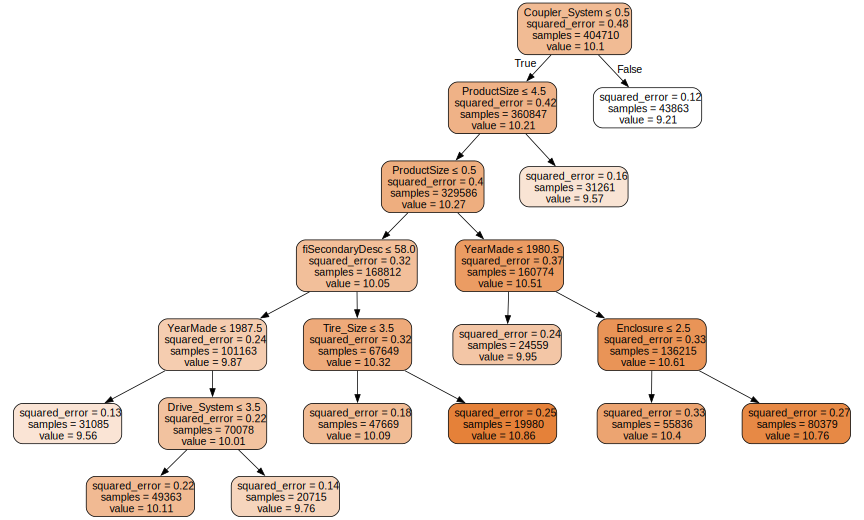

In [34]:
from sklearn.tree import export_graphviz
import graphviz

def draw_tree(t, df, size=10, ratio=0.6, precision=2, **kwargs):
    s=export_graphviz(t, out_file=None, feature_names=df.columns, filled=True, rounded=True,
                      special_characters=True, rotate=False, precision=precision, **kwargs)
    return graphviz.Source(re.sub('Tree {', f'Tree {{ size={size}; ratio={ratio}', s))

draw_tree(tree_model, xs, size=12)

/Users/cactus/miniconda3/envs/fastai/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


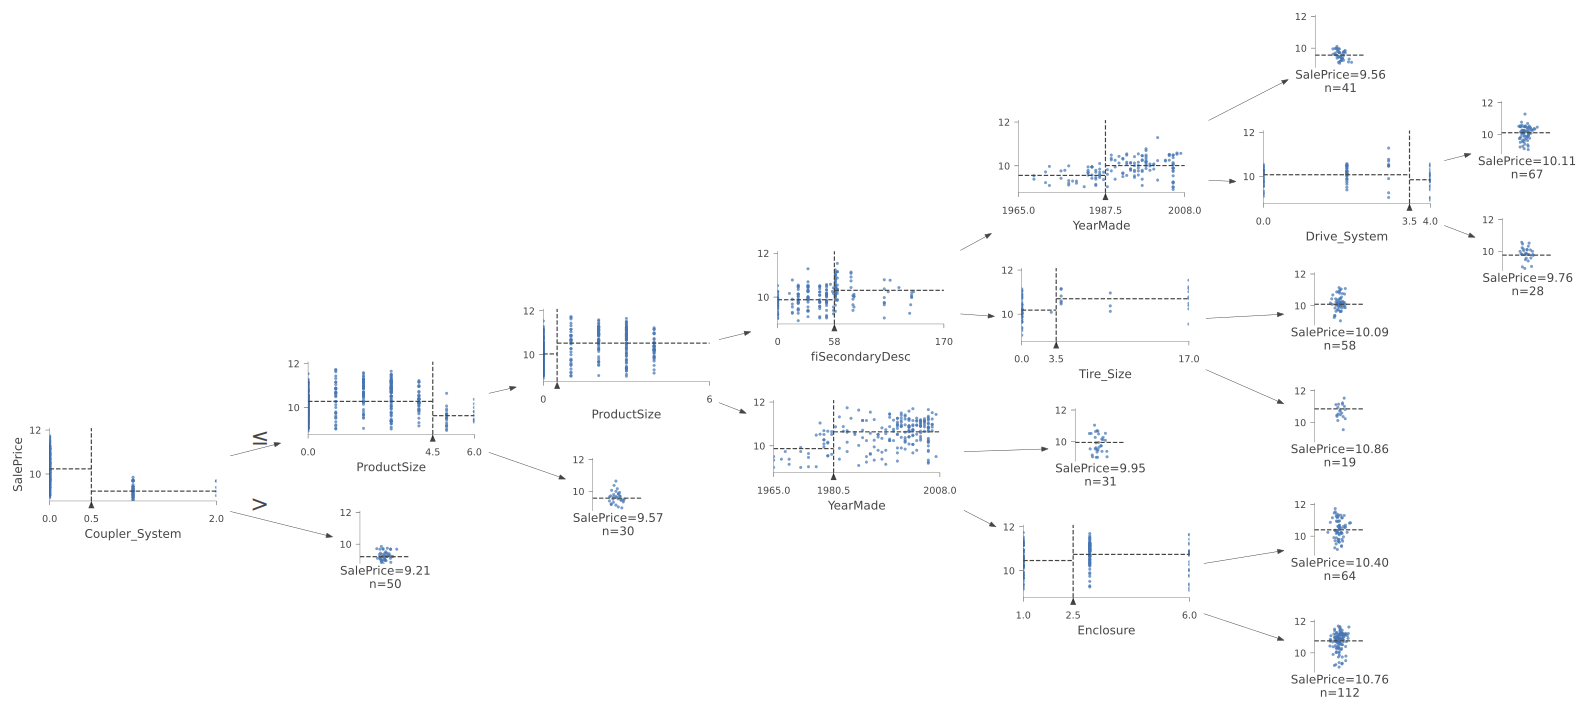

In [35]:
import dtreeviz

samp_idx = np.random.permutation(len(y))[:500]
viz_model=dtreeviz.model(tree_model,
X_train=xs.iloc[samp_idx],
y_train=y.iloc[samp_idx],
feature_names=xs.columns,
target_name=dep_var)

viz_model.view(fontname='DejaVu Sans', scale=1.6, label_fontsize=10, orientation='LR')

In [36]:
# the full tree now
tree_model = DecisionTreeRegressor()
tree_model.fit(xs, y);

In [37]:
def r_mse(pred,y): return round(math.sqrt(((pred-y)**2).mean()), 6)
def m_rmse(m, xs, y): return r_mse(m.predict(xs), y)

In [38]:
# our model is perfect?
m_rmse(tree_model, xs, y)

0.0

In [39]:
# our model is perfect? not! we need to use validation set!
m_rmse(tree_model, valid_xs, valid_y)

0.356084

We got 0 error in the training set but 35% on the validation set, that's the symptoms of overfitting!

Problem lies in how sklearn library works, if we don't define a minimum number of samples to have per leaves, we will get one leaf per row at the bottom of the tree.

THat's the same as trying to classify every single row individually, but we don't want that, we want to classify rows into groups not rows into rows, so we want groups at the bottom of our tree.

In [40]:
tree_model.get_n_leaves()

326744

In [41]:
tree_model = DecisionTreeRegressor(min_samples_leaf=25)
tree_model.fit(to.train.xs, to.train.y)
m_rmse(tree_model, xs, y), m_rmse(tree_model, valid_xs, valid_y)

(0.220303, 0.277981)

In [42]:
tree_model.get_n_leaves()

12358

As we can see the number of leaves have been reduced

# Why do we need Random Forests?

So we saw that' the problem with decision trees, is that we need to balance the size of the leaves:
- the smaller they are, the more accuracy but also less generalization
- the bigger they are the more the model generalize, but lose in accuracy

In [43]:
from sklearn.ensemble import RandomForestRegressor

def rf(xs, y, n_estimators=40, max_samples=200_000,
       max_features=0.5, min_samples_leaf=5, **kwargs):
    return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
        max_samples=max_samples, max_features=max_features,
        min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)
     

forest_model = rf(xs, y);

In [44]:
import pandas as pd

data = {'Training Error': [m_rmse(tree_model, xs, y), m_rmse(forest_model, xs, y), abs(m_rmse(tree_model, xs, y)-m_rmse(forest_model, xs, y))],
        'Validation Error': [m_rmse(tree_model, valid_xs, valid_y), m_rmse(forest_model, valid_xs, valid_y), abs(m_rmse(tree_model, valid_xs, valid_y) - m_rmse(forest_model, valid_xs, valid_y))],
}

df = pd.DataFrame(data)
df.index = ['Decision Tree', 'Random Forest', 'Improvements']
df

,Training Error,Validation Error
Decision Tree,0.220303,0.277981
Random Forest,0.173638,0.237178
Improvements,0.046665,0.040803


### Random Forests are just bagging of rows and columns

If we take each individual trees, we would get the same effect as the random forest

In [45]:
preds = np.stack([t.predict(valid_xs) for t in forest_model.estimators_])

/Users/cactus/miniconda3/envs/fastai/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
/Users/cactus/miniconda3/envs/fastai/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
/Users/cactus/miniconda3/envs/fastai/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
/Users/cactus/miniconda3/envs/fastai/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
/Users/cactus/miniconda3/envs/fastai/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
/Users/cactus/miniconda3/envs/fastai/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: 

In [46]:
r_mse(preds.mean(0), valid_y)

0.237178

### The more trees the better

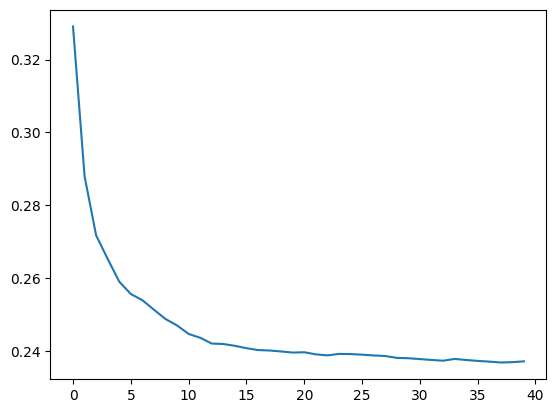

In [47]:
plt.plot([r_mse(preds[:i+1].mean(0), valid_y) for i in range(40)]);

# Solving Accuracy Difference Between Validation and Training set

Recall that our validation accuracy was worse than our trainig set, question is:
- is that because we are overfitting?
- or is that becausae the validation set covers a different time period
- or a bit of both?

There's one way to figure out! out-of-bag errors can help us to find out this

# Out-of-Bag Error

# Model Interpretation

### Prediction Confidence Via Tree Variance

Each tree will make a prediction, if we take the predictions of all trees and check the standard deviation, we can know how "pure" the confidence is, this is the same as the confidence for this case

In [48]:
preds = np.stack([t.predict(valid_xs) for t in forest_model.estimators_])
preds.shape

/Users/cactus/miniconda3/envs/fastai/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
/Users/cactus/miniconda3/envs/fastai/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
/Users/cactus/miniconda3/envs/fastai/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
/Users/cactus/miniconda3/envs/fastai/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
/Users/cactus/miniconda3/envs/fastai/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
/Users/cactus/miniconda3/envs/fastai/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: 

(40, 7988)

In [49]:
preds_std = preds.std(0)

In [50]:
# here's the unified confidence for the first 5 rows of the dataset
# the confidence varies widely, this is particularly useful in production
# if you need to make a decision to buy or sell something
# then you can ask the model the price but also how confident it is about that information
# if it's low you should probably ignore the prediction
preds_std[:5]

array([0.24856307, 0.11881218, 0.08183942, 0.21196139, 0.20414786])

### Strongest Predictors via Feature Importance

Feature importance can help us answer these questions:
- why is the model doing such prediction
- what are the most important predictor in the model
- what are the unimportant predictor in the model

In [51]:
def feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

It also works with trees but also random forest

In [52]:
fi = feat_importance(tree_model, xs)
fi[:10]

,cols,imp
30,Coupler_System,0.225358
6,ProductSize,0.187384
57,YearMade,0.166563
3,fiSecondaryDesc,0.069652
65,saleElapsed,0.063013
28,Tire_Size,0.052969
54,ModelID,0.048989
12,Enclosure,0.037200
7,fiProductClassDesc,0.034336
52,SalesID,0.031509


In [53]:
fi = feat_importance(forest_model, xs)
fi[:10]

,cols,imp
57,YearMade,0.133627
6,ProductSize,0.119589
30,Coupler_System,0.118571
3,fiSecondaryDesc,0.074543
32,Hydraulics_Flow,0.067208
7,fiProductClassDesc,0.053066
65,saleElapsed,0.047947
54,ModelID,0.041917
1,fiModelDesc,0.040215
12,Enclosure,0.035972


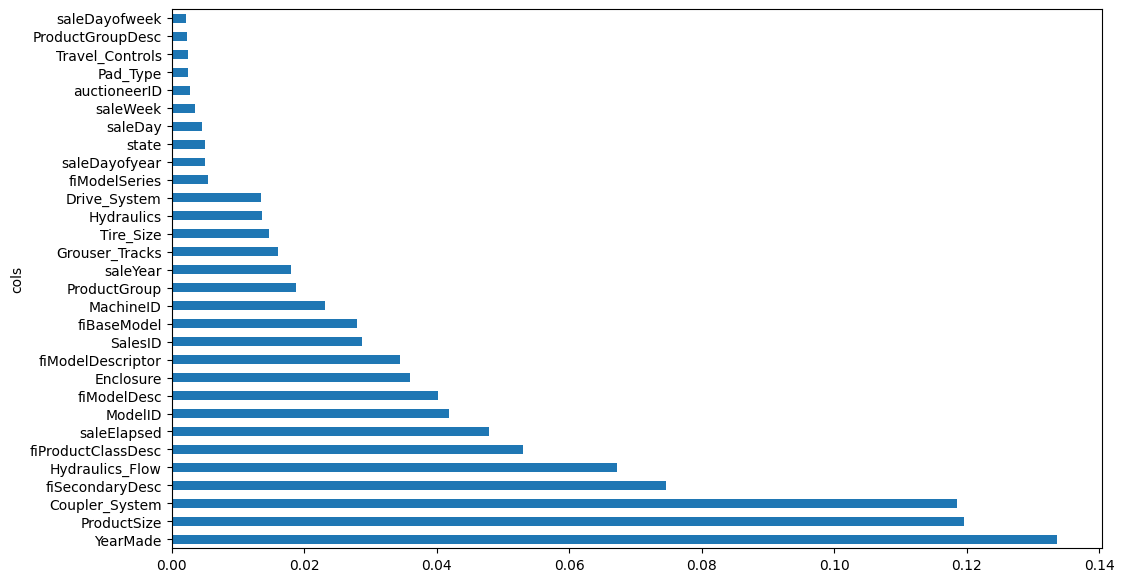

In [54]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(fi[:30]);

### Removing Low-Importance Variables

Once we got stats on the number of times a feature is used to split a node, we can use it to remove the least important features. 

In [55]:
to_keep = fi[fi.imp>0.005].cols
len(to_keep)

22

In [56]:
# We can retrain our model using just this subset of the columns:
xs_imp = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]
forest_model = rf(xs_imp, y)

In [57]:
m_rmse(forest_model, xs_imp, y), m_rmse(forest_model, valid_xs_imp, valid_y)

(0.180322, 0.23888)

In [58]:
len(xs.columns), len(xs_imp.columns)

(66, 22)

The first step to improve a random forest is to simplify it, by reducing the number of variables.

Also in practice, more interpretable model is easier to roll out and maintain

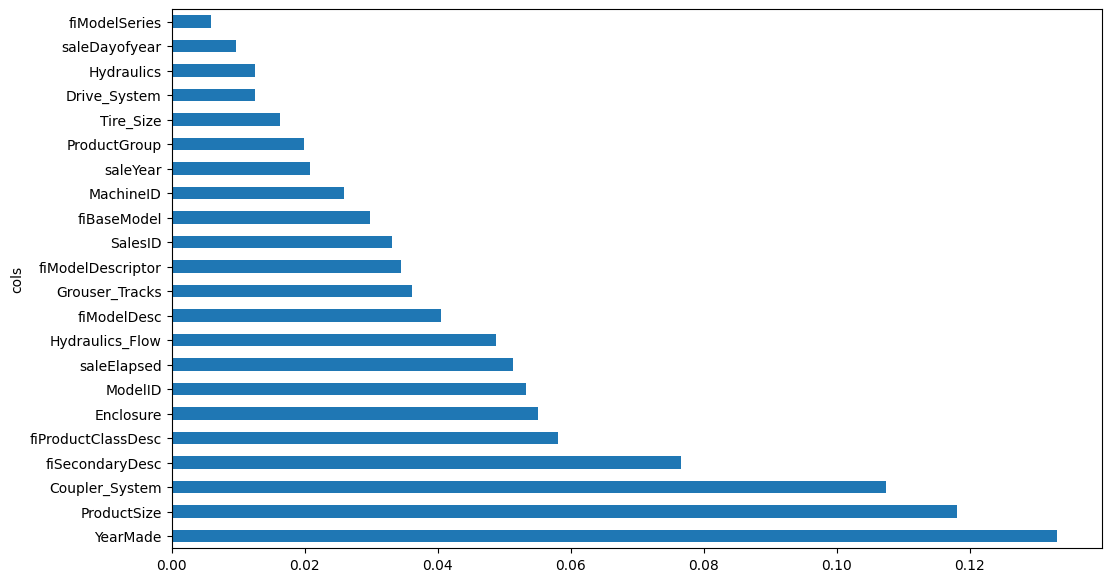

In [59]:
plot_fi(feat_importance(forest_model, xs_imp));

### Removing Redundant Features

In [60]:
from scipy.cluster import hierarchy as hc

def cluster_columns(df, figsize=(10,6), font_size=12):
    corr = np.round(scipy.stats.spearmanr(df).correlation, 4)
    corr_condensed = hc.distance.squareform(1-corr)
    z = hc.linkage(corr_condensed, method='average')
    fig = plt.figure(figsize=figsize)
    hc.dendrogram(z, labels=df.columns, orientation='left', leaf_font_size=font_size)
    plt.show()

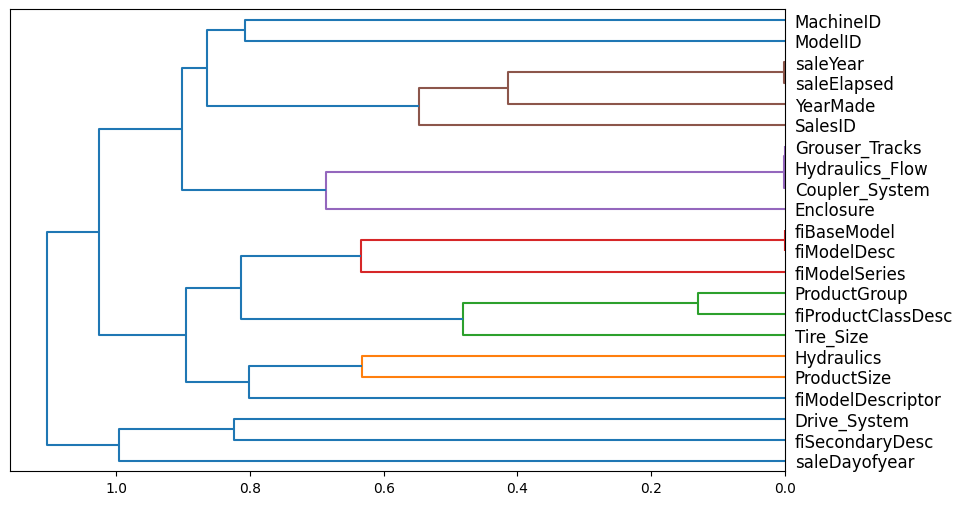

In [61]:
cluster_columns(xs_imp)

Let's try removing some of these closely related features to see if the model can be simplified without impacting the accuracy. First, we establish a baseline:

In [62]:
#  we create a function that quickly trains a random forest and returns the OOB score,
# by using a lower max_samples and higher min_samples_leaf.
def get_oob(df):
    m = RandomForestRegressor(n_estimators=40, min_samples_leaf=15,
        max_samples=50000, max_features=0.5, n_jobs=-1, oob_score=True)
    m.fit(df, y)
    return m.oob_score_

baseline before removing features:

In [63]:
get_oob(xs_imp)

0.8684690032143207

In [67]:
# #Now we try removing each of our potentially redundant variables, one at a time
{c:get_oob(xs_imp.drop(c, axis=1)) for c in (
    'saleYear', 'saleElapsed',
    'fiModelDesc', 'fiBaseModel',
    'Hydraulics_Flow','Grouser_Tracks', 'Coupler_System')}

{'saleYear': 0.867090576041449,
 'saleElapsed': 0.8631101645630379,
 'fiModelDesc': 0.8646973965633269,
 'fiBaseModel': 0.8664232369463445,
 'Hydraulics_Flow': 0.8689079096494183,
 'Grouser_Tracks': 0.8675119497648489,
 'Coupler_System': 0.8679578107488947}

In [68]:
# Now let's try dropping multiple variables.
# We'll drop one from each of the tightly aligned pairs we noticed earlier. Let's see what that does:
to_drop = ['saleYear', 'fiBaseModel', 'Grouser_Tracks']
get_oob(xs_imp.drop(to_drop, axis=1))

0.8644722308478183

We only lost 0.03 pt, that's good enouh. Let's create DataFrames without these columns and save them

In [69]:
xs_final = xs_imp.drop(to_drop, axis=1)
valid_xs_final = valid_xs_imp.drop(to_drop, axis=1)

In [70]:
save_pickle(path/'xs_final.pkl', xs_final)
save_pickle(path/'valid_xs_final.pkl', valid_xs_final)
xs_final = load_pickle(path/'xs_final.pkl')
valid_xs_final = load_pickle(path/'valid_xs_final.pkl')

In [71]:
valid_xs_final.head()

,YearMade,ProductSize,Coupler_System,fiSecondaryDesc,Hydraulics_Flow,fiProductClassDesc,saleElapsed,ModelID,fiModelDesc,Enclosure,fiModelDescriptor,SalesID,MachineID,ProductGroup,Tire_Size,Hydraulics,Drive_System,fiModelSeries,saleDayofyear
22915,2005,3,0,43,0,48,1.317600e+09,4124,2301,1,0,1218822,1024652,5,0,1,0,0,276
22916,2006,0,0,50,0,2,1.317859e+09,24808,278,6,17,1218823,1067601,1,0,0,2,0,279
22917,2006,0,2,0,3,41,1.317859e+09,9580,4514,6,0,1218824,1010582,3,0,4,0,0,279
22918,2003,0,2,0,3,44,1.317859e+09,6270,4213,6,0,1218825,1026609,3,0,4,0,0,279
22919,2007,0,0,21,0,1,1.317859e+09,17976,4647,6,0,1218826,1032638,1,0,0,2,0,279


In [72]:
# Now we can check our RMSE again, to confirm that the accuracy hasn't substantially changed.
forest_model = rf(xs_final, y)
m_rmse(forest_model, xs_final, y), m_rmse(forest_model, valid_xs_final, valid_y)

(0.182937, 0.239654)

In [73]:
# previously we had
# 0.172813	0.236073
#
# so it's a bit better on training set and validation set

### Understand Variable Importance On Dependent Variable Via Partial Dependence

We previously found that yearmade and product size are the strongest predictors, how do we go from there?
We can dig deeper and understand how does changing product size influences the price

First let's get an idea of the repartition of this column

In [74]:
valid_xs_final['ProductSize'].describe()

count    7988.000000
mean        1.560841
std         1.775472
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max         6.000000
Name: ProductSize, dtype: float64

In [75]:
valid_xs_final['ProductSize'].value_counts()

ProductSize
0    3930
3    1331
2    1223
5     627
4     484
1     280
6     113
Name: count, dtype: int64

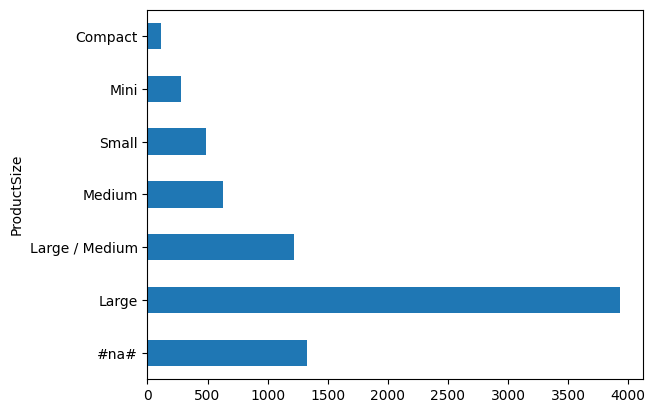

In [76]:
p = valid_xs_final['ProductSize'].value_counts(sort=False).plot.barh()
c = to.classes['ProductSize']
plt.yticks(range(len(c)), c);

 #na is the label fastai applies to missing values

We can do the same for YearMade, we will use an histogram this time since this is a continuous value,
we want to see the repartition by using bins

In [77]:
valid_xs_final['YearMade'].describe()

count    7988.000000
mean     2000.224211
std         7.981162
min      1919.000000
25%      1998.000000
50%      2004.000000
75%      2005.000000
max      2013.000000
Name: YearMade, dtype: float64

In [78]:
valid_xs_final['YearMade'].value_counts()

YearMade
2005    1850
2006     818
2004     746
1999     365
2007     364
2000     356
2003     352
1998     330
2002     325
2001     318
1997     272
1996     231
2008     176
1995     167
1994     156
1993     111
1992      94
1988      93
1990      81
1989      79
1986      79
1991      61
1987      53
2009      41
1984      38
1985      38
1980      34
1977      30
1979      30
1981      30
1973      27
1978      26
1982      25
1983      24
1975      23
1971      19
1976      19
1972      18
1974      15
2011      10
1970      10
1969       7
1968       7
2010       6
1964       5
1965       5
1963       5
1919       4
1920       4
1966       3
1967       3
1956       3
1962       1
2013       1
Name: count, dtype: int64

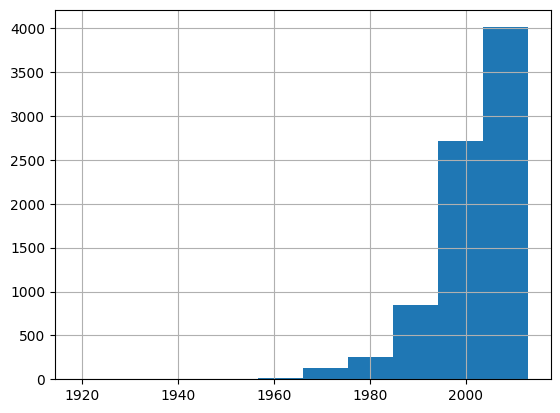

In [79]:
ax = valid_xs_final['YearMade'].hist()

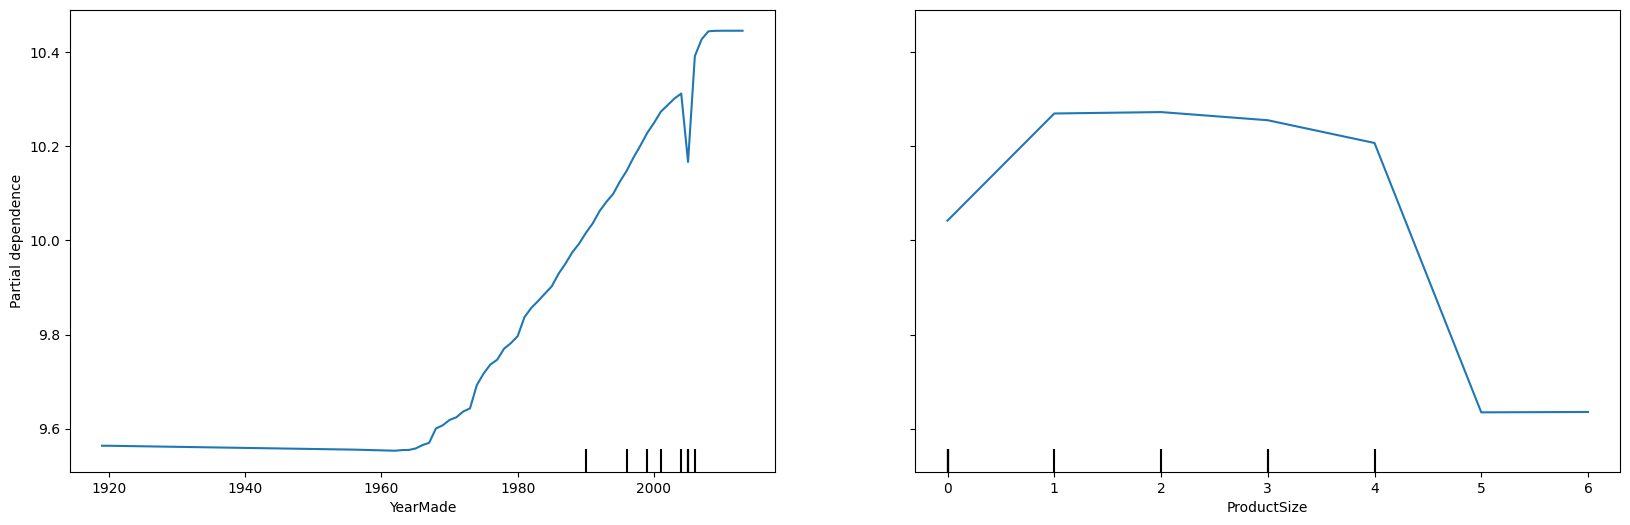

In [80]:
from sklearn.inspection import PartialDependenceDisplay

display = PartialDependenceDisplay.from_estimator(forest_model, valid_xs_final, ['YearMade','ProductSize'])

# Get the figure and axes objects
fig, ax = display.figure_, display.axes_

# Set the desired figure size
fig.set_figwidth(20)
fig.set_figheight(6)

# Show the plot
plt.show()

In [82]:
# the first row
rows = valid_xs_final.iloc[:1]

In [83]:
rows.shape

(1, 19)

### Visualizing Contributions/Ingredients Via TreeInterpreter

In [84]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

from treeinterpreter import treeinterpreter

prediction,bias,contributions = treeinterpreter.predict(forest_model, rows.values)
# prediction = the prediction of the model
# bias = prediction based on taking the mean of the dependent varaible (i.e. the model thati s the root of every tree)
# contributions = the contribution of each feature to the prediction

In [85]:
prediction[0], bias[0], contributions[0].sum()

(array([10.04124945]), 10.104775282988667, -0.06352583754996093)

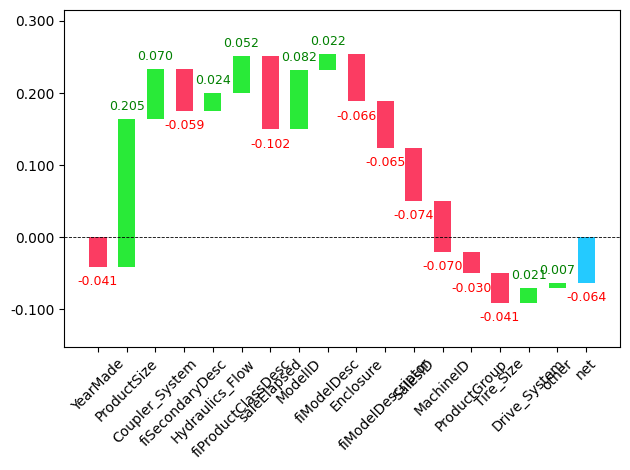

In [86]:
from waterfall_chart import plot as waterfall

waterfall(valid_xs_final.columns, contributions[0], threshold=0.08, 
          rotation_value=45,formatting='{:,.3f}');

# Extrapolation and Neural Networks

### The Extrapolation Problem

In [87]:
import torch 

np.random.seed(42)

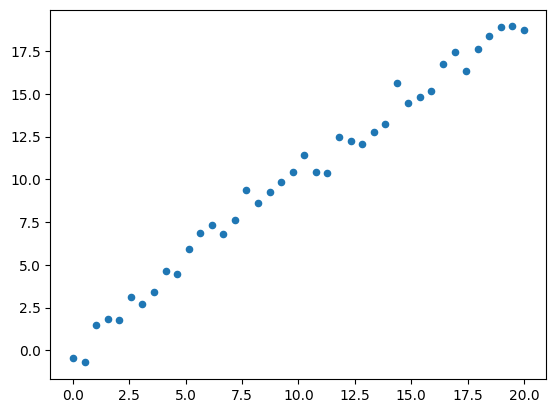

In [88]:
x_lin = torch.linspace(0,20, steps=40)
xs_lin = x_lin.unsqueeze(1)
y_lin = x_lin + torch.randn_like(x_lin)

plt.scatter(x_lin, y_lin, 20)

In [89]:
# we train a random forest with the first 30 rows
m_lin = RandomForestRegressor().fit(xs_lin[:30],y_lin[:30])

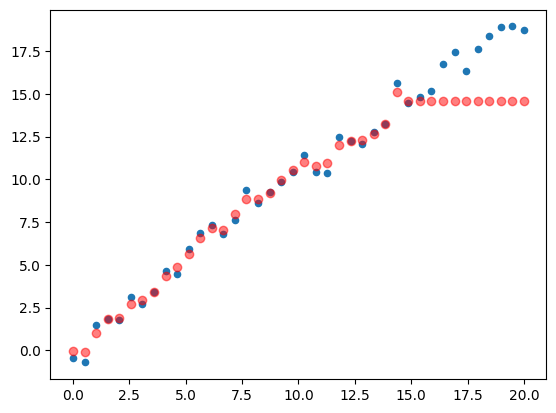

In [90]:
# we now see how the model predicts the whole dataset
plt.scatter(x_lin, y_lin, 20)
plt.scatter(x_lin, m_lin.predict(xs_lin), color='red', alpha=0.5);

In [91]:
# as we can see, the model really sucks at predicting stuff it has never seen
# the extrapolation problem is a variant of the generalization problem.

# the difference is that a random forest cannot predict that outside of the range it has been trained on,
# for example inflation keeps growing over the year
# but random forest cannot predict data that are over (or lower) the range it has been trained on.

In [92]:
df_dom = pd.concat([xs_final, valid_xs_final])
is_valid = np.array([0]*len(xs_final) + [1]*len(valid_xs_final))
df_dom.shape, is_valid.shape

((412698, 19), (412698,))

In [93]:
m = rf(df_dom, is_valid, max_samples=len(df_dom));
feat_importance(m, df_dom)[:6]

,cols,imp
6,saleElapsed,0.504479
18,saleDayofyear,0.358549
11,SalesID,0.101212
12,MachineID,0.034264
9,Enclosure,0.000615
0,YearMade,0.000220


In [94]:
# it seems that age and fare are the biggest difference between the validation and training set

# let's establish a baseline on the rmse
m = rf(xs_final, y)
print('orig', m_rmse(m, valid_xs_final, valid_y))

# then we remove each one by one to see the impact on the rmse
for c in ('saleElapsed','saleDayofyear', 'SalesID', 'MachineID'):
    m = rf(xs_final.drop(c,axis=1), y)
    print(c, m_rmse(m, valid_xs_final.drop(c,axis=1), valid_y))

orig 0.240639
saleElapsed 0.242616
saleDayofyear 0.238165
SalesID 0.237426
MachineID 0.238745


In [95]:
# seems like we can remove everything aside of saleElapsed and still get the same rmse
# let's try this to remove all of them at once
time_vars = ['saleDayofyear', 'SalesID', 'MachineID']
xs_final_time = xs_final.drop(time_vars, axis=1)
valid_xs_time = valid_xs_final.drop(time_vars, axis=1)

m = rf(xs_final_time, y)
m_rmse(m, valid_xs_time, valid_y)

0.231093

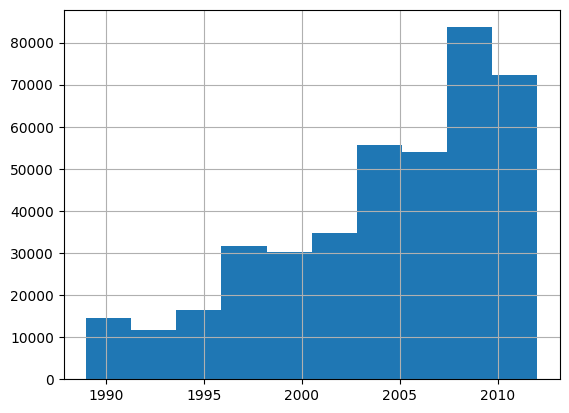

In [96]:
# How about saleElapsed?
# It's out of domain because some dates are too far in the past

xs['saleYear'].hist();

In [97]:
# so let's take a more recent portion of the dates
filt = xs['saleYear']>2004
xs_filt = xs_final_time[filt]
y_filt = y[filt]
     

m = rf(xs_filt, y_filt)
m_rmse(m, xs_filt, y_filt), m_rmse(m, valid_xs_time, valid_y)

(0.179585, 0.231218)

In [98]:
# almost no effect!

 # Using a Neural Network

In [99]:
df_nn = pd.read_csv(path/'TrainAndValid.csv', low_memory=False)
df_nn['ProductSize'] = df_nn['ProductSize'].astype('category')
df_nn['ProductSize'] = df_nn['ProductSize'].cat.set_categories(sizes, ordered=True)
df_nn[dep_var] = np.log(df_nn[dep_var])
df_nn = add_datepart(df_nn, 'saledate')

/Users/cactus/miniconda3/envs/fastai/lib/python3.11/site-packages/fastai/tabular/core.py:23: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.


Let's leverage the work with random forest about choosing columns

In [100]:
df_nn_final = df_nn[list(xs_final_time.columns) + [dep_var]]

In [101]:
# we need to split continuous and categorical variables so that fastai knows how to deal with categorical variables

# we set embedding size to not more than 10000
# mbedding sizes larger than 10,000 should generally only be used after you've tested whether there are better ways
# to group the variable, so we'll use 9,000 as our max_card:
cont_nn,cat_nn = cont_cat_split(df_nn_final, max_card=9000, dep_var=dep_var)

In [102]:
cont_nn, cat_nn

(['saleElapsed'],
 ['YearMade',
  'ProductSize',
  'Coupler_System',
  'fiSecondaryDesc',
  'Hydraulics_Flow',
  'fiProductClassDesc',
  'ModelID',
  'fiModelDesc',
  'Enclosure',
  'fiModelDescriptor',
  'ProductGroup',
  'Tire_Size',
  'Hydraulics',
  'Drive_System',
  'fiModelSeries'])

In [103]:
# Great we defined our categorical variable so our model will know how to embed them,
# but before we do that, let's look at the cardinality of these categorical variables
# who say categorical say discrete variabel say embedding size
# the bigger the cardinality the bigger the embedding size, we want to avoid having huge embedding sizes, because...
df_nn_final[cat_nn].nunique()

YearMade                73
ProductSize              6
Coupler_System           2
fiSecondaryDesc        177
Hydraulics_Flow          3
fiProductClassDesc      74
ModelID               5281
fiModelDesc           5059
Enclosure                6
fiModelDescriptor      140
ProductGroup             6
Tire_Size               17
Hydraulics              12
Drive_System             4
fiModelSeries          123
dtype: int64

In [104]:
xs_filt2 = xs_filt.drop('fiModelDescriptor', axis=1)
valid_xs_time2 = valid_xs_time.drop('fiModelDescriptor', axis=1)
m2 = rf(xs_filt2, y_filt)
m_rmse(m2, xs_filt2, y_filt), m_rmse(m2, valid_xs_time2, valid_y)

(0.181644, 0.232418)

There's minimal impact, so we will remove it as a predictor for our neural network:

In [105]:
cat_nn.remove('fiModelDescriptor')

In [106]:
# The modelID is not useful for us and it has high cardinality so we can remove it as well
cat_nn.remove('ModelID')  

In [107]:
from fastai.data.transforms import *

procs_nn = [Categorify, FillMissing, Normalize]
to_nn = TabularPandas(df_nn_final, procs_nn, cat_nn, cont_nn,
                      splits=splits, y_names=dep_var)

In [108]:
# tabular model and don't generally require much GPU RAM, so we can use larger batch sizes
dls = to_nn.dataloaders(1024)

In [109]:
y = to_nn.train.y
y.min(),y.max()

(8.465899467468262, 11.863582611083984)

In [110]:
# we got quite a large dataset
y_range = (8, 12)
layers = [500,250]
learn = tabular_learner(dls, y_range=y_range, layers=layers,
                        n_out=1, loss_func=F.mse_loss)

SuggestedLRs(slide=0.00363078061491251, valley=0.00019054606673307717)

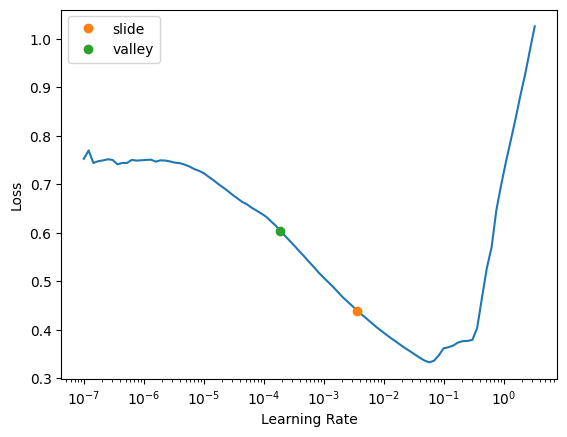

In [111]:
learn.lr_find(suggest_funcs=(slide, valley))

In [112]:
learn.fit_one_cycle(5, 0.001)

epoch,train_loss,valid_loss,time
0,0.060525,0.069559,00:08
1,0.052378,0.057408,00:08
2,0.048064,0.066940,00:08
3,0.042274,0.055531,00:07
4,0.039581,0.051210,00:07


In [113]:
preds,targs = learn.get_preds()
r_mse(preds,targs)

0.226296

In [ ]:
# it's not much better than our random forest!

### Let's try ensembling the Neural Net and Forest Together

In [115]:
rf_preds = m.predict(valid_xs_time)
ens_preds = (to_np(preds.squeeze()) + rf_preds) /2
r_mse(ens_preds,valid_y)

0.223079

forest + neural net give us a little improvement! you could even do an ensembling of the neural nets first, then do your ensembling with the forest

### Accessing The Embedding Of The Neural Net And Use It For Another Model

In [117]:
# Accessing parameter groups for learning rate scheduling or other purposes
for group in learn.opt.param_groups:
    print(group)
    # Each group is a dictionary where 'params' key holds the parameters of that group


{'params': [Parameter containing:
tensor([[ 0.0038, -0.0023, -0.0008,  ..., -0.0130, -0.0013, -0.0048],
        [ 0.0254,  0.0031,  0.0341,  ..., -0.0167,  0.0169,  0.0308],
        [ 0.0179,  0.0275,  0.0595,  ..., -0.0378, -0.0262,  0.0227],
        ...,
        [ 0.0477, -0.0544, -0.0711,  ...,  0.0683,  0.0787,  0.0554],
        [-0.0028, -0.0038, -0.0160,  ..., -0.0107,  0.0023,  0.0030],
        [ 0.0160, -0.0125, -0.0047,  ...,  0.0174,  0.0280,  0.0305]],
       device='mps:0', requires_grad=True), Parameter containing:
tensor([[ 0.0386,  0.0282,  0.0263,  0.0375,  0.0343],
        [-0.0270, -0.0173,  0.0489, -0.0204, -0.0177],
        [-0.0233,  0.0141,  0.0086, -0.0364, -0.0274],
        [-0.0215,  0.0252,  0.0323, -0.0241, -0.0053],
        [ 0.0061,  0.0142, -0.0118, -0.0049,  0.0041],
        [ 0.0726,  0.0200, -0.0328,  0.0579,  0.0697],
        [ 0.0501,  0.0256, -0.0105,  0.0458,  0.0242]], device='mps:0',
       requires_grad=True), Parameter containing:
tensor([[-0.01